In [157]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [158]:
from IPython.display import FileLink

In [159]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

In [160]:
!head -n1 /home/armanda/N-project/data/HB/HB_Noxide.csv

In [161]:
%%R
sd = read.csv("/home/armanda/N-project/data/HB/HB_Noxide.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Treatment, Elevation, Depth)

rownames(sd) = sd$Sample.Name

sd = sample_data(sd)

In [162]:
%%R
counts = read.csv("/home/armanda/N-project/data/HB/HB_Noxide.csv", stringsAsFactors = FALSE) %>%
    select(Nap, Nar, NirK, NirS, cNor, qNor, Nos, Sample.Name, Sequence.Read.Depth) %>%
    gather(key, value, -Sample.Name, -Sequence.Read.Depth) %>%
    mutate(count = value / Sequence.Read.Depth * 1000000) %>%
    select(Sample.Name, key, count) %>%
    spread(key, count)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [163]:
%%R
counts %>% head

OTU Table:          [7 taxa and 6 samples]
                     taxa are columns
           Nap      Nar      NirK NirS      cNor     qNor       Nos
CJ01  1.764444 20.26437 12.564978    0 0.5881479 33.47096 2.6733996
CJ010 2.973698 17.54148 11.226546    0 1.6372047 28.70120 1.7040293
CJ011 3.170566 15.01356 11.003728    0 0.6993895 27.88233 3.1239398
CJ012 2.030182 14.99211 11.712587    0 1.0931748 31.18151 2.7589650
CJ013 1.281215  3.67653  5.097007    0 0.5570499 14.87323 0.2506725
CJ014 1.740555  4.08652  4.691930    0 0.3027052 13.96228 1.0216300


In [164]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 4 sample variables ]


Wisconsin double standardization
Run 0 stress 0.1183359 
Run 1 stress 0.118336 
... procrustes: rmse 7.35626e-05  max resid 0.0002262895 
*** Solution reached


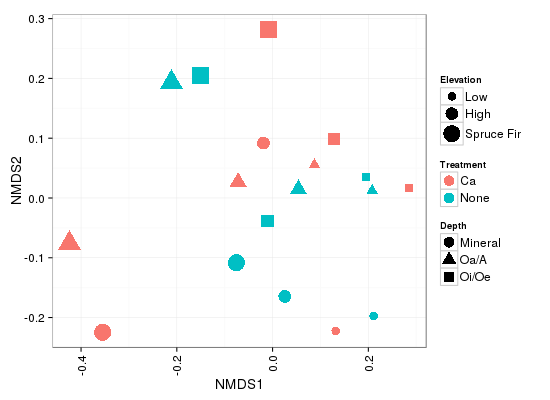

In [166]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

#p = p + scale_color_manual(values = c("black", "grey64"))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = text.x, 
                                       #y = text.y,
                                       #label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

ggsave("/home/armanda/N-project/figs/Noxide ordination.nmds.pdf", h = 5.5, w = 7.75)            

p

In [11]:
FileLink("/home/armanda/N-project/figs/Noxide ordination.nmds.pdf")

/home/armanda/N-project/figs/Noxide ordination.nmds.pdf

In [141]:
%%R
x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

ord.plot.nmds

             NMDS1       NMDS2 Sample.Name Treatment  Elevation   Depth
CJ01  -0.019232933  0.09191827        CJ01        Ca       High Mineral
CJ010  0.025481080 -0.16459354       CJ010      None       High Mineral
CJ011  0.054000312  0.01468284       CJ011      None       High    Oa/A
CJ012 -0.011230813 -0.03846371       CJ012      None       High   Oi/Oe
CJ013  0.211084581 -0.19759188       CJ013      None        Low Mineral
CJ014  0.207891408  0.01265526       CJ014      None        Low    Oa/A
CJ015  0.195424853  0.03470939       CJ015      None        Low   Oi/Oe
CJ016 -0.075466777 -0.10813294       CJ016      None Spruce Fir Mineral
CJ017 -0.211201973  0.19348217       CJ017      None Spruce Fir    Oa/A
CJ018 -0.150042392  0.20464889       CJ018      None Spruce Fir   Oi/Oe
CJ02  -0.071964671  0.02695148        CJ02        Ca       High    Oa/A
CJ03   0.128205322  0.09853476        CJ03        Ca       High   Oi/Oe
CJ04   0.131854124 -0.22232830        CJ04        Ca        Low 

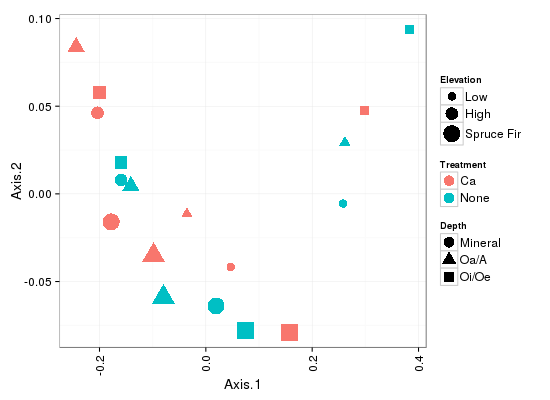

In [169]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot.mds, aes(x = Axis.1, y = Axis.2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

#p = p + scale_color_manual(values = c("black", "grey64"))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = Axis.1, 
                                       #y = Axis.2,
                                       #label = Sample.Name), size = 4, vjust = 1.75, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

p

In [170]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Elevation = factor(data$Elevation, levels = c("Low", "High", "Spruce Fir"))

adonis(bray.dist ~ Elevation, data)


Call:
adonis(formula = bray.dist ~ Elevation, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Elevation  2   0.48983 0.244914  13.165 0.63707  0.001 ***
Residuals 15   0.27905 0.018604         0.36293           
Total     17   0.76888                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [171]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Treatment = factor(data$Treatment, levels = c("Ca", "None"))

adonis(bray.dist ~ Treatment, data)


Call:
adonis(formula = bray.dist ~ Treatment, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)
Treatment  1   0.05306 0.053064  1.1861 0.06901  0.287
Residuals 16   0.71582 0.044739         0.93099       
Total     17   0.76888                  1.00000       


In [172]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Depth = factor(data$Depth, levels = c("Mineral", "Oa/A", "Oi/Oe"))

adonis(bray.dist ~ Depth, data)


Call:
adonis(formula = bray.dist ~ Depth, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)
Depth      2   0.09124 0.045622  1.0099 0.11867  0.395
Residuals 15   0.67764 0.045176         0.88133       
Total     17   0.76888                  1.00000       


In [95]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

In [74]:
%%R
counts = read.csv("/home/armanda/N-project/data/HB/HB_hierarchy_normalized.csv") %>%
    t %>% {
        l = ncol(.)
        colnames(.) = paste("gene.", 1:l, sep="")
        .
       .
    }

counts = otu_table(counts, taxa_are_rows = FALSE)

In [75]:
%%R
sd = data.frame(Sample = rownames(counts))

rownames(sd) = sd$Sample

sd = sample_data(sd)

In [31]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11034 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 1 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.07174176 
Run 1 stress 0.1243344 
Run 2 stress 0.07174173 
... New best solution
... procrustes: rmse 2.90024e-05  max resid 6.148857e-05 
*** Solution reached


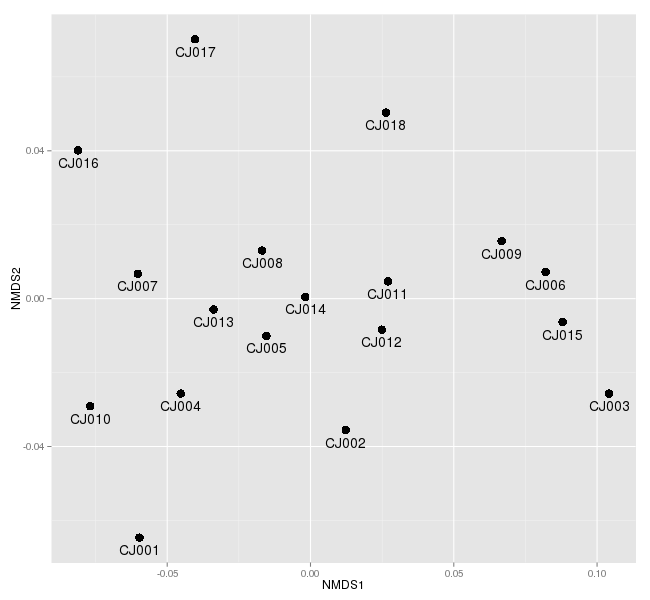

In [38]:
%%R -h 600 -w 650
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

d = ord.plot

d$Sample = rownames(d)

p = ggplot(d, aes(x = NMDS1, y = NMDS2, label = Sample))

p = p + geom_point(size = 4)

p = p + geom_text(hjust = 0.5, vjust = 1.75)

p

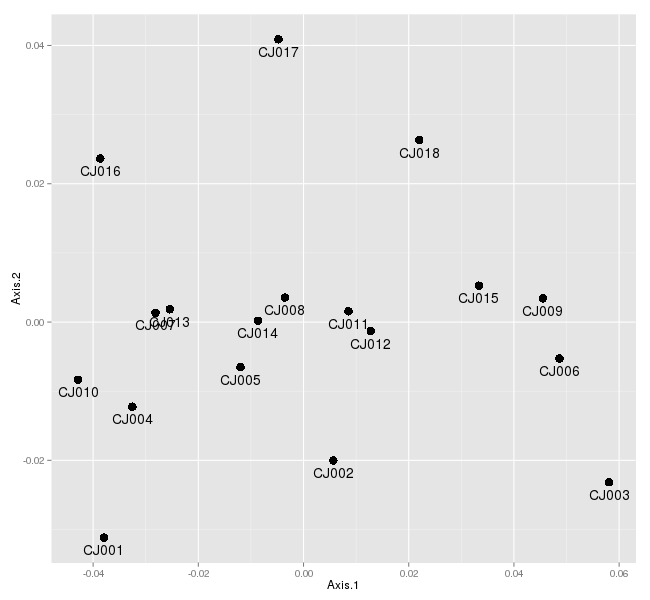

In [41]:
%%R -h 600 -w 650
ord = ordinate(ps, method = "MDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

d = ord.plot

d$Sample = rownames(d)

p = ggplot(d, aes(x = Axis.1, y = Axis.2, label = Sample))

p = p + geom_point(size = 4)

p = p + geom_text(hjust = 0.5, vjust = 1.75)

p

In [61]:
%%R
counts = read.csv("/home/armanda/N-project/data/HB/HB_hierarchy_normalizedtoallreads.csv") %>%
    t %>% {
        l = ncol(.)
        colnames(.) = paste("gene.", 1:l, sep="")
        .
       .
    }

counts = otu_table(counts, taxa_are_rows = FALSE)

In [62]:
%%R
sd = data.frame(Sample = rownames(counts))

rownames(sd) = sd$Sample

sd = sample_data(sd)

In [63]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11034 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 1 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.07443252 
Run 1 stress 0.1157853 
Run 2 stress 0.1289895 
Run 3 stress 0.137627 
Run 4 stress 0.0755531 
Run 5 stress 0.1519076 
Run 6 stress 0.1157847 
Run 7 stress 0.1251126 
Run 8 stress 0.07443253 
... procrustes: rmse 0.001775761  max resid 0.005615036 
*** Solution reached


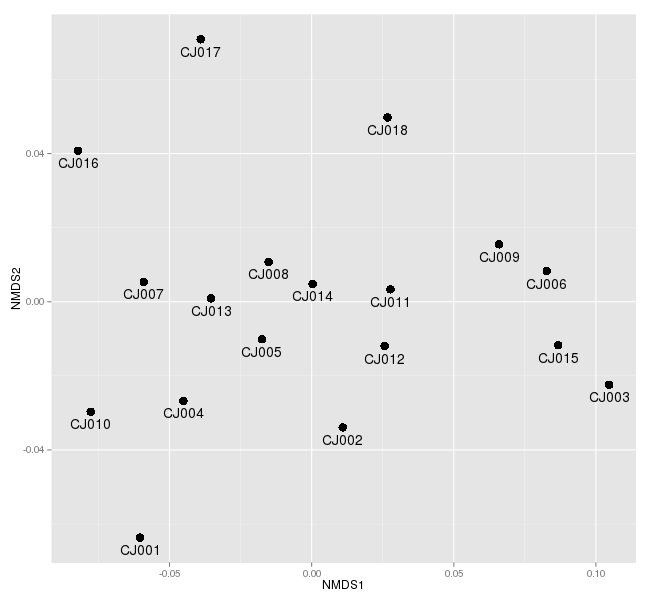

In [64]:
%%R -h 600 -w 650
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

d = ord.plot

d$Sample = rownames(d)

p = ggplot(d, aes(x = NMDS1, y = NMDS2, label = Sample))

p = p + geom_point(size = 4)

p = p + geom_text(hjust = 0.5, vjust = 1.75)

p

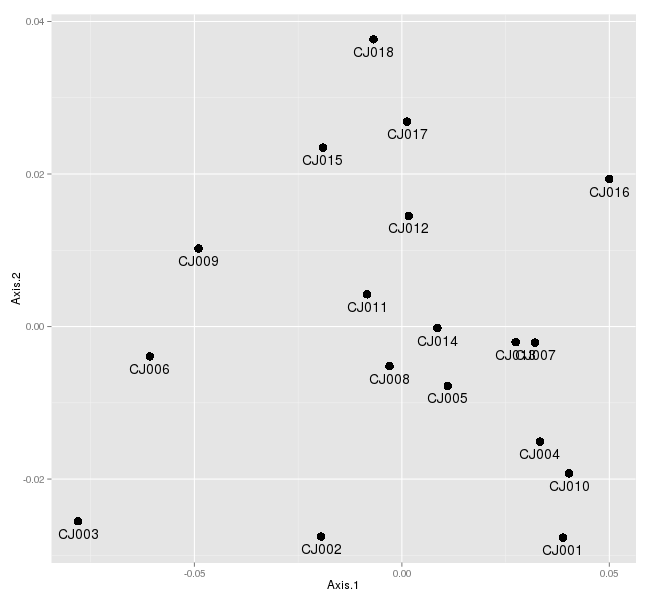

In [65]:
%%R -h 600 -w 650
ord = ordinate(ps, method = "MDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

d = ord.plot

d$Sample = rownames(d)

p = ggplot(d, aes(x = Axis.1, y = Axis.2, label = Sample))

p = p + geom_point(size = 4)

p = p + geom_text(hjust = 0.5, vjust = 1.75)

p

In [85]:
%%R
sd = read.csv("/home/armanda/N-project/data/HB/HB_HMNM.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Treatment, Elevation, Depth)

rownames(sd) = sd$Sample.Name
sd = sample_data(sd)

In [102]:
%%R
counts = read.csv("/home/armanda/N-project/data/HB/HB_HMNM.csv", stringsAsFactors = FALSE) %>%
    gather(key, value, -Sample.Name, -Treatment, -Elevation, -Depth) %>%
    select(Sample.Name, key, value) %>%
    spread(key, value)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [104]:
%%R
counts %>% head

OTU Table:          [11034 taxa and 6 samples]
                     taxa are columns
          Gene1    Gene2    Gene3     Gene4     Gene5    Gene6     Gene7
CJ001 4.6001052 48.76111 1.840042  5.520126  81.26853 657.8150 0.0000000
CJ002 0.3036216 42.50703 2.428973  3.036216  98.06979 840.4247 0.0000000
CJ003 0.0000000 63.30772 3.973288  7.416804 101.45128 926.8356 0.2648859
CJ004 0.0000000 41.06119 1.094965  4.927342  99.91555 670.6660 0.0000000
CJ005 0.0000000 56.20174 2.906987  5.813973  85.27161 764.7797 0.0000000
CJ006 0.0000000 66.68085 3.769942 10.367341 104.14465 876.5115 0.0000000
          Gene8     Gene9    Gene10   Gene11    Gene12    Gene13   Gene14
CJ001 11.040252  70.84162 0.0000000 198.4179 22.693852 1066.9177 521.0386
CJ002 13.966595 102.62411 0.9108649 174.8861 17.002811  911.7758 481.2403
CJ003  9.800777 140.91928 0.7946576 171.9109  7.416804  823.0004 516.5274
CJ004 11.770873  69.25653 0.8212237 178.4793 13.139579 1025.4347 452.7680
CJ005  8.236462  82.36462 0.000000

In [105]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11034 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 4 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.07174176 
Run 1 stress 0.07174172 
... New best solution
... procrustes: rmse 0.0001178961  max resid 0.0002485776 
*** Solution reached


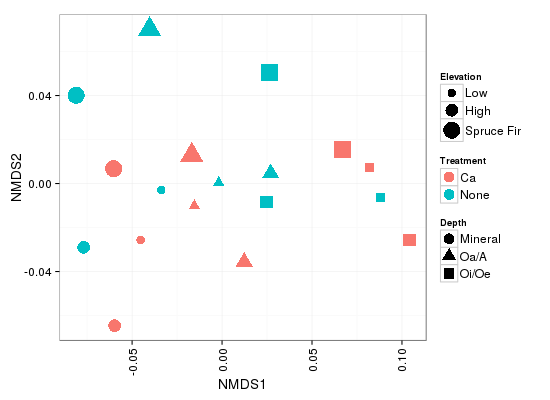

In [142]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

#p = p + scale_color_manual(values = c("black", "grey64"))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = text.x, 
                                       #y = text.y,
                                       #label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))          

p

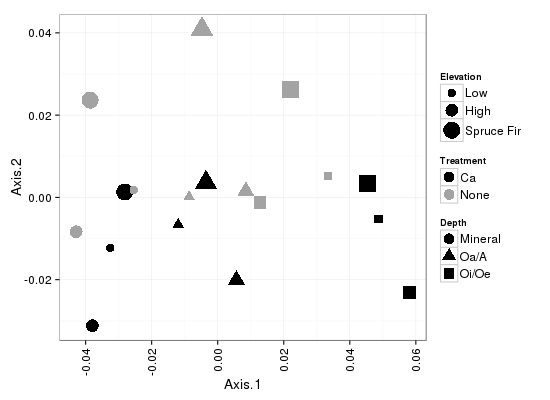

In [144]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot.mds, aes(x = Axis.1, y = Axis.2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

p = p + scale_color_manual(values = c("black", "grey64"))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = Axis.1, 
                                       #y = Axis.2,
                                       #label = Sample.Name), size = 4, vjust = 1.75, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

p

In [111]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Elevation = factor(data$Elevation, levels = c("Low", "High", "Spruce Fir"))

adonis(bray.dist ~ Elevation, data)


Call:
adonis(formula = bray.dist ~ Elevation, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)
Elevation  2  0.004715 0.0023575  1.3229 0.14994  0.211
Residuals 15  0.026731 0.0017821         0.85006       
Total     17  0.031446                   1.00000       


In [112]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Treatment = factor(data$Treatment, levels = c("Ca", "None"))

adonis(bray.dist ~ Treatment, data)


Call:
adonis(formula = bray.dist ~ Treatment, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)
Treatment  1 0.0026705 0.0026705  1.4848 0.08492  0.209
Residuals 16 0.0287759 0.0017985         0.91508       
Total     17 0.0314463                   1.00000       


In [113]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Depth = factor(data$Depth, levels = c("Mineral", "Oa/A", "Oi/Oe"))

adonis(bray.dist ~ Depth, data)


Call:
adonis(formula = bray.dist ~ Depth, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Depth      2  0.015952 0.0079762  7.7219 0.50729  0.001 ***
Residuals 15  0.015494 0.0010329         0.49271           
Total     17  0.031446                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [146]:
%%R
sd = read.csv("/home/armanda/N-project/data/HB/HB_HANM.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Treatment, Elevation, Depth)

rownames(sd) = sd$Sample.Name
sd = sample_data(sd)

In [147]:
%%R
counts = read.csv("/home/armanda/N-project/data/HB/HB_HANM.csv", stringsAsFactors = FALSE) %>%
    gather(key, value, -Sample.Name, -Treatment, -Elevation, -Depth) %>%
    select(Sample.Name, key, value) %>%
    spread(key, value)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [148]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11034 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 4 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.07443252 
Run 1 stress 0.115785 
Run 2 stress 0.07443111 
... New best solution
... procrustes: rmse 0.001293439  max resid 0.004221234 
*** Solution reached


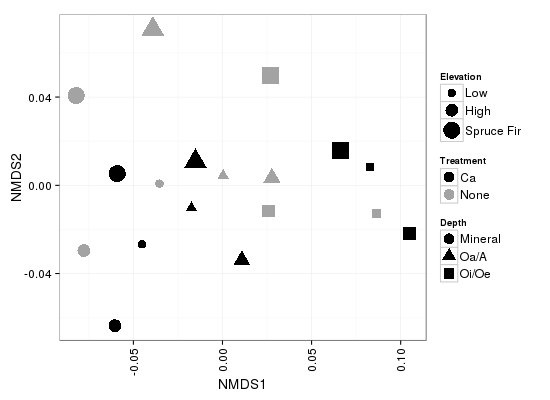

In [150]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

p = p + scale_color_manual(values = c("black", "grey64"))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = text.x, 
                                       #y = text.y,
                                       #label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))          

p

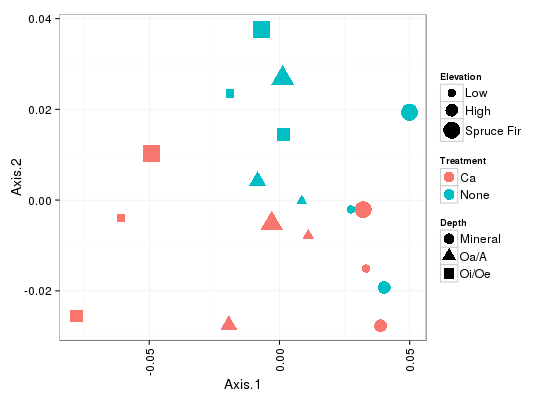

In [152]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot.mds, aes(x = Axis.1, y = Axis.2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

#p = p + scale_color_manual(values = c("black", "grey64"))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = Axis.1, 
                                       #y = Axis.2,
                                       #label = Sample.Name), size = 4, vjust = 1.75, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

p

In [153]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Elevation = factor(data$Elevation, levels = c("Low", "High", "Spruce Fir"))

adonis(bray.dist ~ Elevation, data)


Call:
adonis(formula = bray.dist ~ Elevation, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)
Elevation  2  0.005086 0.0025432  1.1214 0.13008  0.332
Residuals 15  0.034016 0.0022677         0.86992       
Total     17  0.039103                   1.00000       


In [154]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Treatment = factor(data$Treatment, levels = c("Ca", "None"))

adonis(bray.dist ~ Treatment, data)


Call:
adonis(formula = bray.dist ~ Treatment, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)  
Treatment  1  0.004721 0.0047207  2.1968 0.12073  0.093 .
Residuals 16  0.034382 0.0021489         0.87927         
Total     17  0.039103                   1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [155]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Depth = factor(data$Depth, levels = c("Mineral", "Oa/A", "Oi/Oe"))

adonis(bray.dist ~ Depth, data)


Call:
adonis(formula = bray.dist ~ Depth, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Depth      2  0.017823 0.0089116  6.2819 0.45581  0.001 ***
Residuals 15  0.021279 0.0014186         0.54419           
Total     17  0.039103                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
